In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import Word2Vec


import imblearn
# oversampling a multi-class classification dataset
from imblearn.over_sampling import SMOTE

In [6]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [155]:
pip uninstall gensim


^C
Note: you may need to restart the kernel to use updated packages.


In [7]:
from gensim.scripts.glove2word2vec import glove2word2vec

In [8]:
#To show entire text under column comment_text
pd.set_option('display.max_colwidth', -1)

<ipython-input-8-0f8685db9136>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [9]:
df=pd.read_csv('E:\\private\\Intern\\Ratings-Project\\Ratings Project\\RatingData.csv')

In [10]:
df

category  \
0      laptop    
1      laptop    
2      laptop    
3      laptop    
4      laptop    
...       ...    
15577  laptop    
15578  laptop    
15579  laptop    
15580  laptop    
15581  laptop    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [11]:
df.rating.value_counts()

4    4834
5    4587
3    3370
1    1804
2    979 
0    8   
Name: rating, dtype: int64

In [23]:
df.shape

(15575, 3)

In [12]:
#we have some data with rating 0
df[df.rating==0]

,category,review,rating
1278,laptop,"Its too cool laptop.. easy to use and simple to understand..brand quality is awesme ...also there are available in different coolors.. firstly of all its processsing speed is too gud...durabilityy is also awesme .. ram has increasd his performance , , i wanna loved it .... there was a lot of options in ths laptop",0
8489,laptop,NaN,0
8556,laptop,NaN,0
8558,laptop,NaN,0
8559,laptop,NaN,0
8560,laptop,NaN,0
9507,laptop,Dell inspiron 15 7560 laptop are best laptop for programmer because this laptop are very fast and is build quality is supreb and this laptop are light weight and easy to carry every ware and in this laptop window 10 are inbuilt than every person easy to use this laptop and ram are expendeble to 16 gb that means not hanging problem in this laptop but value are so high compare to other company laptop but dell is a trustable company in laptop and dell company service are so fast and in the service center person behavior are so good i like dell company service but really price are so high thanks i hope you like my think.....,0
14725,laptop,Dell Inspiron 3537 is the worst laptop in all dell laptops.there are so many problems are arises in my laptop.\n\n1)after 6 months dvd player is stopped working.\n\n2) after 1year the mother board is gone.\n\n3)speakers clarity is also bad.\n\n4) display is not good.\n\n5)receiving of wireless signals is also poor.\n\n6)battery backup is also poor.\n\n7)keypad key's cost also high then compared to other company laptop keys.\n\n8)so much amount of heat is coming while operating the laptop.\n\nso I did not prefer this laptop to buy.,0


In [13]:
df.iloc[[14725],[2]] =1

In [14]:
df.iloc[[14725],[2]]

,rating
14725,1


In [15]:
df=df.drop(df[df.rating<1].index,axis=0)

In [16]:
df[df.rating<1]

,category,review,rating


In [17]:
df.rating.value_counts()

4    4834
5    4587
3    3370
1    1805
2    979 
Name: rating, dtype: int64

In [18]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
df.isnull().sum()

category    0
review      0
rating      0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15575 entries, 0 to 15581
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  15575 non-null  object
 1   review    15575 non-null  object
 2   rating    15575 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 486.7+ KB


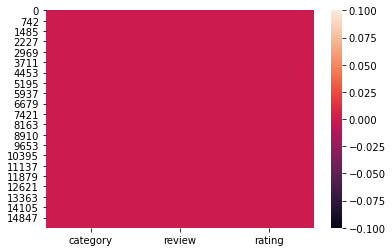

In [40]:
#presentation of null values
sns.heatmap(data=df.isnull())

In [41]:
df=df.dropna()

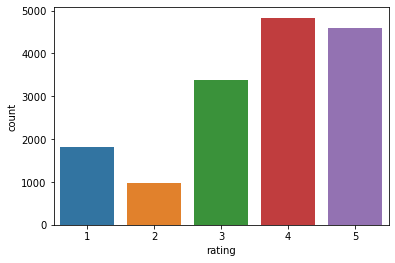

In [43]:
sns.countplot(data=df,x='rating')

In [44]:
stop_words=set(stopwords.words('english'))

In [47]:
#Lets do  stemming.It will remove ing,ed and all from the words
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [63]:
#data preprocessing/data cleaning
def cleanDocument(df_data):
    df_data=df_data.str.replace('[^a-zA-Z ]', '')
    df_data=df_data.str.replace(r'\s+',' ')
    df_data=df_data.apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))
    df_data =df_data.apply(stemming)
    df_data=df_data.apply(lambda x:' '.join(term for term in x.split() if len(term) > 3 ))
    df_data=df_data.str.lower()
    return df_data
    

In [64]:
df['review']=cleanDocument(df.review)

In [75]:
X= df['review'].str.strip()
Y= df.iloc[:,-1]


In [76]:
X

0        engin collleg student trust friend bought laptop cryinga saybest gethp worst getmost obsolet system pain never never never repeat friendnev productsrath throw money garbag productspleas nevet                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [149]:
model = Word2Vec(vector_size=300,window=3, min_count=2, workers=4,sg=1)

In [150]:
model.build_vocab(X)


In [151]:

model.train(X, total_examples=model.corpus_count, epochs=30, report_delay=1)


(28907453, 169014600)

In [152]:
model.save('E:\\private\\Intern\\Ratings-Project\\word2vec.model')

In [153]:
reloaded_w2v_model = Word2Vec.load('E:\\private\\Intern\\Ratings-Project\\word2vec.model')

In [156]:
import gensim.downloader
print(list(gensim.downloader.info().keys()))

['corpora', 'models']


In [157]:
print(list(gensim.downloader.info()['models']))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [158]:
pretrained_word2vec = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
import tensorflow
from keras.preprocessing import sequence

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000130F1E9BB80>
Traceback (most recent call last):
  File "C:\Users\STS\anaconda3\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 
